In [2]:
#imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import datetime

In [3]:
#loading data
vstoxx_df = pd.read_csv("Data/VSTOXXhistorical.txt",
                 index_col=0, 
                 parse_dates=True, 
                 dayfirst=True)
 
vix_df = pd.read_csv("Data/VIXhistorical.csv",
                     index_col=0,
                     parse_dates=True)

vstoxx_df = vstoxx_df.iloc[:, 1:]
vstoxx_df = vstoxx_df.rename(columns={"Indexvalue": "Close"})
vstoxx_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6500 entries, 1999-01-04 to 2024-07-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6500 non-null   float64
dtypes: float64(1)
memory usage: 101.6 KB


In [4]:
#concatenating data
cutoff_date = dt.datetime(1999, 1, 4)
df = pd.DataFrame(
    {"VSTOXX": vstoxx_df.loc[vstoxx_df.index >= cutoff_date, "Close"],
     "VIX": vix_df.loc[vix_df.index >= cutoff_date, "CLOSE"]} 
)
df.head()

,VSTOXX,VIX
1999-01-04,18.2033,26.17
1999-01-05,29.6912,24.46
1999-01-06,25.1670,23.34
1999-01-07,32.5205,24.37
1999-01-08,33.2296,23.28


Text(0, 0.5, 'Price')

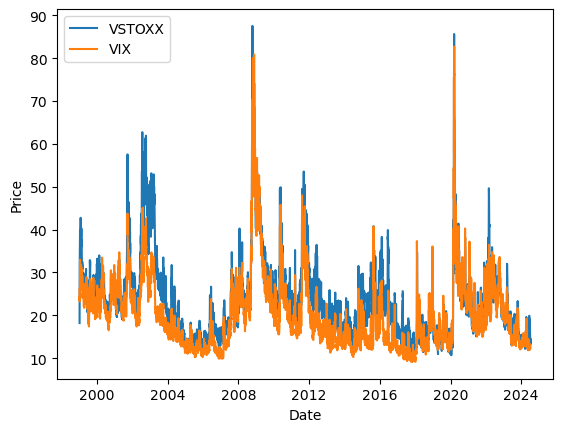

In [5]:
#plotting graphs 
plt.plot(df.index, df.loc[:, "VSTOXX"], label="VSTOXX")
plt.plot(df.index, df.loc[:, "VIX"], label="VIX")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")

In [6]:
#calculating log returns
df.loc[:, "VIX log returns"] = np.log(df["VIX"]) - np.log(df["VIX"].shift(1))
df.loc[:, "VSTOXX log returns"] = np.log(df["VSTOXX"]) - np.log(df["VSTOXX"].shift(1))
df = df.iloc[1:, :]
df.head(2)

,VSTOXX,VIX,VIX log returns,VSTOXX log returns
1999-01-05,29.6912,24.46,-0.067575,0.489248
1999-01-06,25.1670,23.34,-0.046871,-0.165317


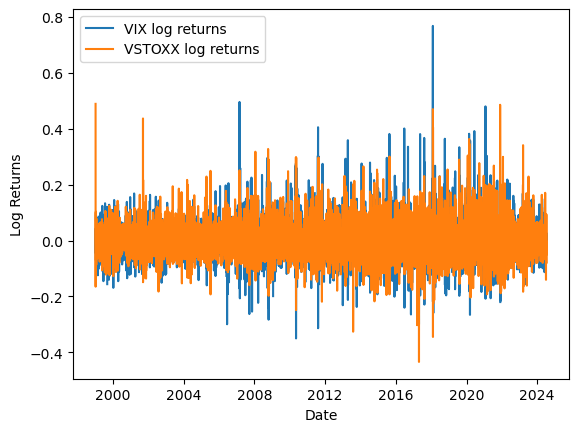

In [7]:
#plotting log returns
plt.plot(df.index, df.loc[:, "VIX log returns"], label="VIX log returns")
plt.plot(df.index, df.loc[:, "VSTOXX log returns"], label="VSTOXX log returns")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.show()

Text(0, 0.5, 'VSTOXX - VIX')

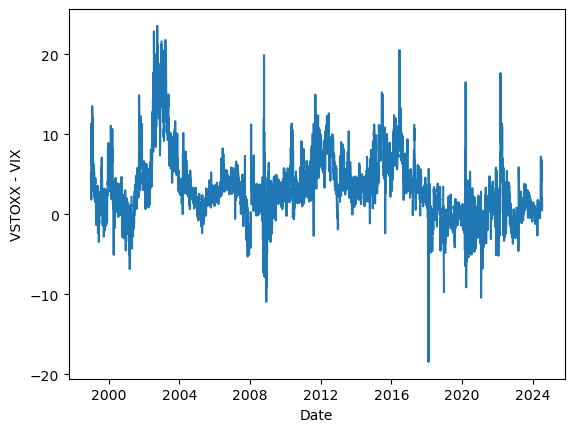

In [10]:
#plotting spread
df.loc[:, "spread"] = df["VSTOXX"] - df["VIX"]
plt.plot(df.index, df["spread"])
plt.xlabel("Date")
plt.ylabel("VSTOXX - VIX")

In [7]:
#analytics
df = df.dropna()
df.describe()

,VSTOXX,VIX,VIX log returns,VSTOXX log returns
count,6121.000000,6121.000000,6121.000000,6121.000000
mean,23.494885,20.086842,-0.001174,-0.000996
std,9.374045,8.441770,0.068959,0.062816
min,10.678300,9.140000,-0.350588,-0.434716
25%,17.000000,13.960000,-0.040086,-0.037790
50%,21.576300,18.260000,-0.005958,-0.005790
75%,27.084800,23.870000,0.032020,0.030059
max,87.512700,82.690000,0.768245,0.489248
